In [122]:
import requests, time
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import numpy as np

NEWS_CATEGORY_URL = "https://min-api.cryptocompare.com/data/news/categories"
LIMIT_QUERY = 2000

In [23]:
'''
currency : "BTC", "ETH", "BCH", ...
'''
def news_request(category, lTs = int(datetime.now().timestamp())):
    params = {
        "categories" : category, 
        "lTs" : lTs
    }
    req = requests.get(NEWS_URL, params = params).json()
    return req["Data"]

In [33]:
def get_categories():
    req = requests.get(NEWS_CATEGORY_URL).json()
    result = [value['categoryName'] for value in req]
    return result

In [6]:
categories

['BTC',
 'BCH',
 'ETH',
 'LTC',
 'XMR',
 'ZEC',
 'ETC',
 'XRP',
 'TRX',
 'ADA',
 'DASH',
 'XTZ',
 'USDT',
 'Mining',
 'Exchange',
 'Market',
 'Asia',
 'ICO',
 'Regulation',
 'Blockchain',
 'Trading',
 'Technology',
 'Wallet',
 'Altcoin',
 'Fiat',
 'Business',
 'Commodity',
 'Sponsored']

In [7]:
len(categories)

28

# Basic Statistics

In [42]:
basic_df = df(0, index = range(2013, 2023), columns = ['all']+categories)

In [62]:
def count_number(year):
    input_df = pd.read_csv("./data/news/news_{}.csv".format(year))
    for category in categories:
        try:
            filter_df = input_df[input_df['categories'].str.contains(category)]
            basic_df[category][year] = len(filter_df)
        except:
            pass
    basic_df['all'][year] = len(input_df)

for year in range(2013, 2023):
    count_number(year)

In [63]:
basic_df

,all,BTC,BCH,ETH,LTC,XMR,ZEC,ETC,XRP,TRX,...,Regulation,Blockchain,Trading,Technology,Wallet,Altcoin,Fiat,Business,Commodity,Sponsored
2013,28,24,0,1,0,0,0,0,0,0,...,3,0,3,1,0,0,3,1,0,1
2014,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,20,6,0,0,2,0,0,4,2,0,...,0,8,10,16,0,2,0,0,0,2
2017,5002,2720,0,729,181,84,30,17,123,3,...,585,1467,1050,691,70,275,570,691,33,891
2018,18238,8758,0,2346,588,288,176,76,968,99,...,2542,5367,4515,2247,301,1387,1639,2480,120,2777
2019,18250,9399,492,3213,885,228,117,139,1711,308,...,2104,4035,5818,1921,250,2293,1660,2558,95,691
2020,18300,9507,579,2918,456,207,117,138,1207,79,...,1883,2854,5900,1942,150,2004,1727,3252,194,482
2021,18250,9095,285,3213,367,101,51,111,895,73,...,2466,1998,6372,1172,68,2538,1582,3658,88,812
2022,4700,2008,10,940,33,15,10,21,156,8,...,614,825,1610,307,35,680,377,836,26,256


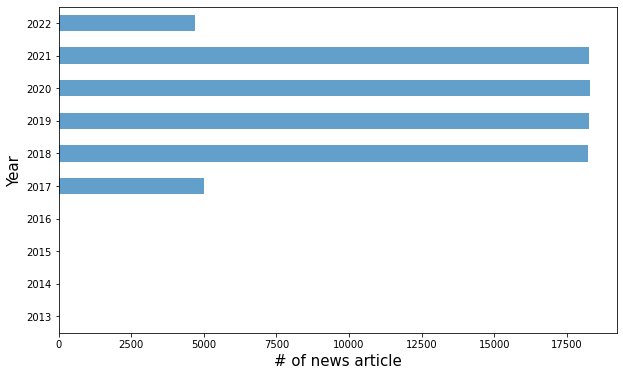

In [71]:
df = basic_df['all']
df.plot(kind = "barh", figsize = (10, 6),alpha = 0.7)
plt.xlabel("# of news article", size = 15)
plt.ylabel("Year", size = 15)
plt.show()

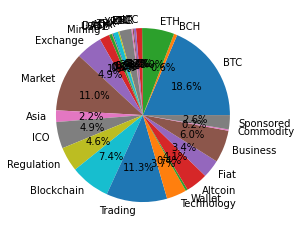

In [74]:
ratio = [basic_df[row].sum() for row in basic_df if row != 'all']
labels = [row for row in basic_df if row != 'all']

plt.pie(ratio, labels = labels, autopct = '%.1f%%')
plt.show()

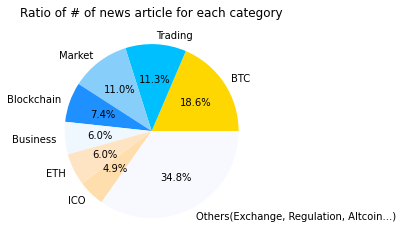

In [157]:
df = basic_df.sum()
df = df.drop(['all'])
df= df.sort_values(ascending = False)

N = 7
topN = df.iloc[:N]
other = df.iloc[N:]
others_name = "Others({}...)".format(", ".join(list(other.index)[:3]))

ratios = topN.to_list() + [other.sum()]
labels = list(topN.index) + [others_name]
colors = [ 'gold', 'deepskyblue', 'lightskyblue',  'dodgerblue','aliceblue',  'bisque', 'navajowhite', 'ghostwhite']
plt.pie(ratios, labels = labels, autopct = '%.1f%%', colors = colors)
plt.title("Ratio of # of news article for each category")
plt.show()

15


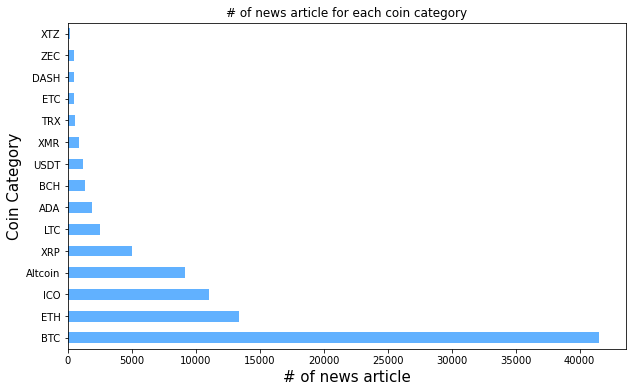

In [158]:
coins = ['BTC',
 'BCH',
 'ETH',
 'LTC',
 'XMR',
 'ZEC',
 'ETC',
 'XRP',
 'TRX',
 'ADA',
 'DASH',
 'XTZ',
 'USDT',
 'ICO',
 'Altcoin']
print(len(coins))
df = basic_df[coins]
df = df.sum()
df= df.sort_values(ascending = False)
df.plot(kind = "barh", figsize = (10, 6),alpha = 0.7, color="dodgerblue")
plt.xlabel("# of news article", size = 15)
plt.ylabel("Coin Category", size = 15)
plt.title('# of news article for each coin category')
plt.show()